# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [7]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97

Model: Y = 0.56 * X + 6.33


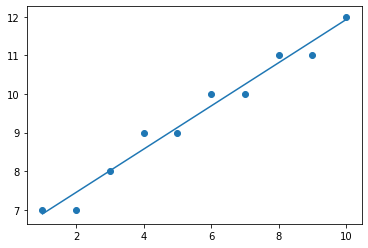

In [12]:
# Basic Regression Diagnostics
# ----------------------------
def calc_slope(xs,ys):
    x_bar = xs.mean()
    y_bar = ys.mean()
    xy = xs*ys
    x_sqr = xs*xs
    return ((x_bar*y_bar)-xy.mean())/(x_bar**2 - x_sqr.mean())

def best_fit(xs,ys):
    slope = calc_slope(xs,ys)
    intercept = ys.mean()-(slope*xs.mean())    
    return slope, intercept

def reg_line (m, c, xs):
    return [(m*x)+c for x in xs]

def sq_err(y_real, y_predicted):
    return sum((y_real- y_predicted)**2)

def r_squared(y_real, y_predicted):
    return 1- (sq_err(y_real, y_predicted)/sq_err(y_real,y_real.mean()))

slope = round(best_fit(X,Y)[0],2)
yint = round(best_fit(X,Y)[1],2)
Rsqr = round(r_squared(Y, reg_line(slope, yint, X)),2)

print('Slope: {}'.format(slope)) # Slope: 0.56
print('Y-Intercept: {}'.format(yint)) # Y-Intercept: 6.33
print('R-Squared: {}'.format(Rsqr)) # R-Squared: 0.97
# ----------------------------
print('\nModel: Y = {} * X + {}'.format(slope,yint)) # Model: Y = 0.56 * X + 6.33

plt.scatter(X,Y)
plt.plot(X, reg_line(slope,yint,X));

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

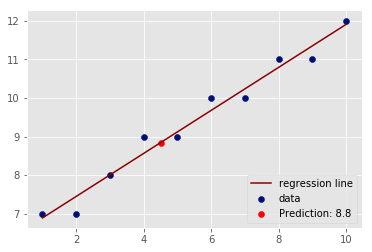

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

In [13]:
hw = pd.read_csv('heightweight.csv')
hw.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96

Model: Y = 5.54 * X + -204.48


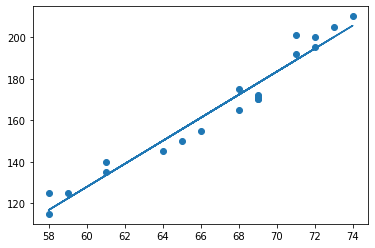

In [18]:
height = hw['height']
weight = hw['weight']

slope = round(best_fit(height, weight)[0],2)
yint = round(best_fit(height,weight)[1],2)
Rsqr = round(r_squared(weight, reg_line(slope, yint, height)),2)

print('Slope: {}'.format(slope)) # Slope: 0.56
print('Y-Intercept: {}'.format(yint)) # Y-Intercept: 6.33
print('R-Squared: {}'.format(Rsqr)) # R-Squared: 0.97
# ----------------------------
print('\nModel: Y = {} * X + {}'.format(slope,yint)) # Model: Y = 0.56 * X + 6.33

plt.scatter(height,weight)
plt.plot(height, reg_line(slope,yint,height));

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 